# Přehled funkcí

Scipy je knihovna poskytující monožství základních algoritmů pro numerické výpočty a zpracování dat. Je úzce navázána na NumPy. Většina algoritmů jsou standardní implementace v C a Fortranu přičemž SciPy k nim poskytuje jednotné a elegantní Pythoní rozhraní.

Přehled funkcí s odkazy do dokumentace:

- [**Speciální matematické funkce**](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html) 
  [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) Beselovy funkce, eliptické funkce, jejich derivace a další 

- **Numerická integrace řešení ODE**
  [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate), 
      - adaptivní numerická integrace funkcí v 1D, 2D, 3D. Ve 2D a 3D jsou hranice oblastí dané funkcemi.  
      - integrace diferenciálních rovnic: počáteční úlohy `solve_ivp`, okrajové úlohy `solve_bvp`

- [**Optimalizace a nelineární rovnice**](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
  [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
  Gradientní (lokální) metody pro nevázané a vázané minimalizační problémy, 'globální' optimalizace, řešení soustav nelineární algebraických rovnic
  
- [**Interpolace**](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)
  [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)
  Interpolace polynomi a spline funkcemi v 1D (a 2D).

- [**Fourierova transformace**](https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)
  [`scipy.fftpack`](https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
  Diskrétní fuourierova transformace a její varianty, diskrétní konvoluce.
  
- [**Zpracování signálu**](https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)
  [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)
  Filtry, konvoluce, spektrum, ...
  
- [**Lineární algebra**](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html)
  [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
  Funkce z `numpy.linalg` plus podpora pokročilejších algoritmů. 

    - [**Vlastní čísla pro řídké matice (ARPACK)**](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html)  
      [`scipy.sparse.linalg.eigs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html#scipy.sparse.linalg.eigsscipy.)

- [**Práce s prostorovými daty**](https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html)
  [`scipy.spatial`](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial)
  Triangulace, Voronoi diagramy, konvexní obaly
  
- [**Statistika a pravděpodobnost**](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
  [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
  Distribuční funkce, hustoty a generátory pro různá rozdělení. Vybraný vektorové náhodné veličiny. Odhady parametrů,
  testování hypotéz, ...
  
- [**Zpracování obrazu**](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)
  [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

  

## Řešení rovnic


In [14]:
# Solving equation `x^n == 1` v komplexním oboru, pomocí Newtonovy metody

import scipy.optimize as opt

degree = 4

def fun(x):
    re, im = x
    z = complex(re, im)
    fz = z**degree - 1
    return [fz.real, fz.imag ]

def fprime(x):
    re, im = x
    z = complex(re, im)
    dfdz = degree*z**(degree - 1)
    return [[ dfdz.real, dfdz.imag], [-dfdz.imag, dfdz.real ]]
    
def get_root(z0_ar):
    res = opt.root(fun, z0_ar, method='krylov' )
    re, im = res.x
    
    #re, im = opt.fsolve(fun, z0_ar, fprime=fprime)
    #re, im = opt.fsolve(fun, z0_ar, maxfev=20)
    
    root_idx = degree * np.angle(complex(re, im))/2/np.pi
    return root_idx
    
    


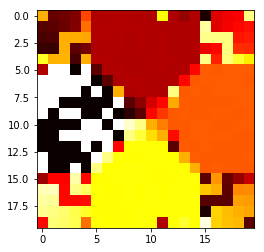

In [15]:
import matplotlib.pyplot as plt
import numpy as np

side = np.linspace(-2,2, 20)
X, Y = np.meshgrid(side, side)
xy = np.stack((X,Y), axis=2)
Z = np.zeros_like(X)
Z = np.apply_along_axis(get_root, 2, xy)
    
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

## Optimization, non-linear least squares

In [3]:
# Parametric non-linear model
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# Artificial data with noise.
xdata = np.linspace(0, 5, 50)
beta = (0.25, 0.75, 0.5)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

# Misfit function
def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = opt.leastsq(g, beta_start)
beta_opt


array([ 0.26876158,  0.73317286,  0.55372434])

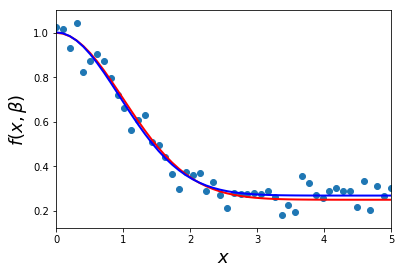

In [4]:
fig, ax = plt.subplots()
# Plot data
ax.scatter(xdata, ydata)
# Plot exact func
ax.plot(xdata, y, 'r', lw=2)
# Plot fit
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()


## Interpolace, Aproximace

### Čebyševovy polynomy

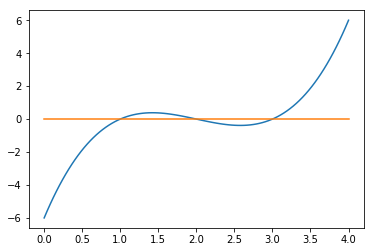

In [5]:
import numpy.polynomial as P

p = P.Polynomial.fromroots([1,2,3])
x=np.linspace(0,4,100)
plt.plot(x, p(x))
plt.plot(x, np.zeros_like(x))
plt.show()

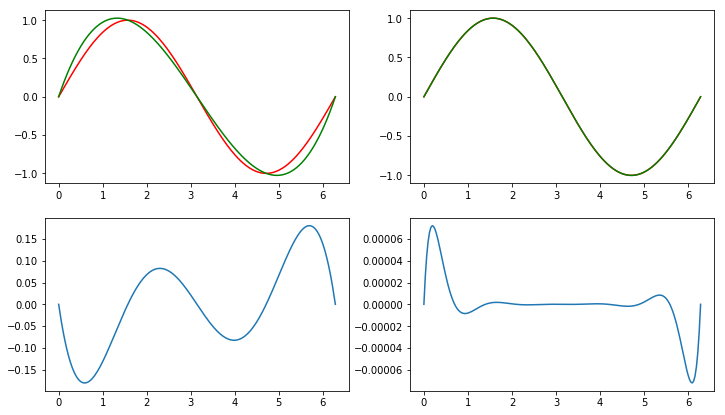

In [6]:
import numpy.linalg as la

def cheb_sin(deg):
    x_sample = np.linspace(0, 2*np.pi, deg)
    y_sample = np.sin(x_sample)
    A = P.chebyshev.chebvander(x_sample, len(x_sample)-1)
    c = la.solve(A, y_sample)
    return P.Chebyshev(c)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
i_func = cheb_sin(5)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[1][0].plot(x, np.sin(x) - i_func(x))

i_func = cheb_sin(10)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[1][1].plot(x, np.sin(x) - i_func(x))
plt.show()


## Spline interpolation

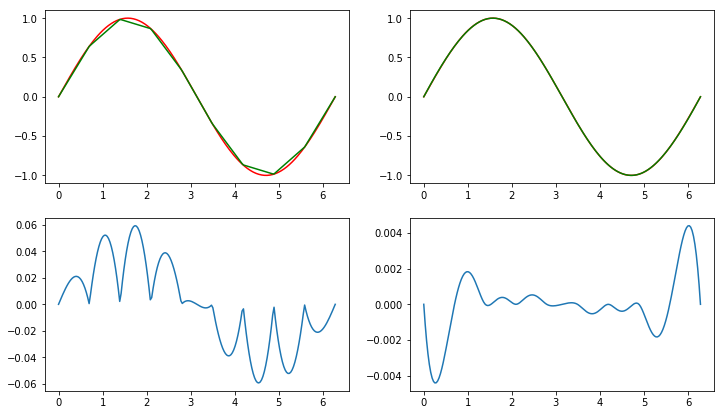

In [7]:
import scipy.interpolate as interpolate

def spline_sin(N, deg):
    x_sample = np.linspace(0, 2*np.pi, N)
    y_sample = np.sin(x_sample)
    return interpolate.interp1d(x_sample, y_sample, kind=deg)
    
fig,ax  = plt.subplots(2, 2, figsize=(12, 7))
    
i_func = spline_sin(10,1)    
x=np.linspace(0, 2*np.pi, 200)
ax[0][0].plot(x, np.sin(x), c='r')
ax[0][0].plot(x, i_func(x), c='g')
ax[1][0].plot(x, np.sin(x) - i_func(x))

i_func = spline_sin(10,3)
ax[0][1].plot(x, np.sin(x), c='r')
ax[0][1].plot(x, i_func(x), c='g')
ax[1][1].plot(x, np.sin(x) - i_func(x))
plt.show()

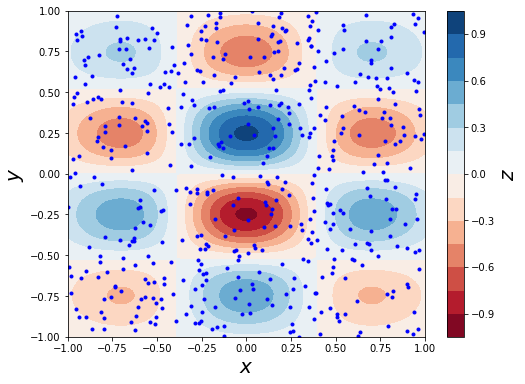

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# random 2d sample points
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
# samples
zdata = f(xdata, ydata)

# Plot function and sample points
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.', c='b')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)
plt.show()

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


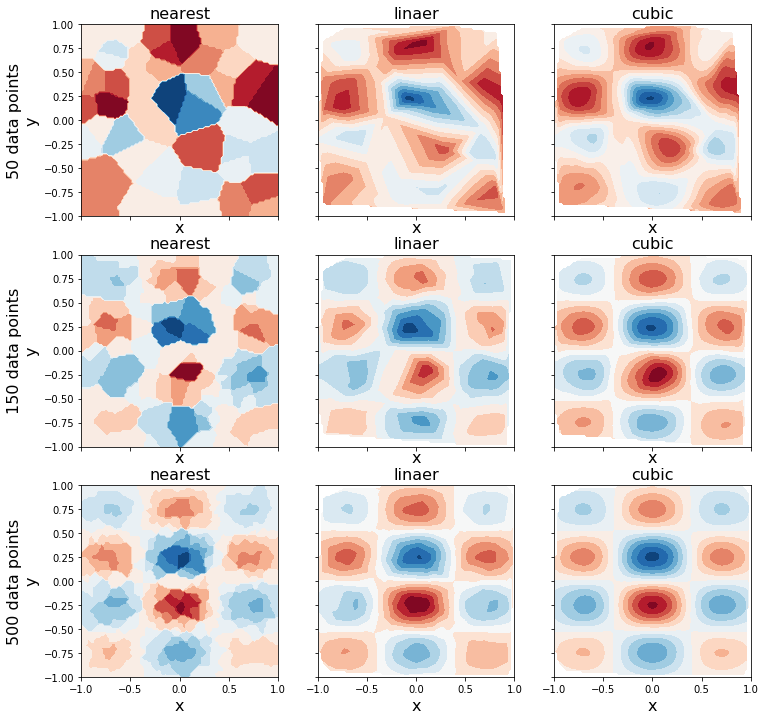

In [9]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

def z_interpolate(xdata, ydata, zdata):
    """
    Interpolate unstructured samples to super sampled structured grid
    """
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

# Plot resulting interpolant for increasing number of smaple points.
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    print(X.shape, Y.shape, Zi_0.shape)
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linaer", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

    for m in range(len(n_vec)):
        axes[idx, m].set_xlabel("x", fontsize=16)
    
plt.show()    


(50, 50) (50, 50) (50, 50)


/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


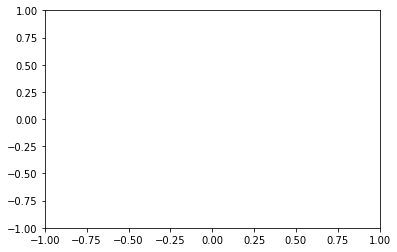

In [10]:
# Under sampling (WIP)
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

# Test bivariate function
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# Many samples
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

# sparse regular grid
x = y = np.linspace(-1, 1, 5)
X, Y = np.meshgrid(x, y)
# Interpolate from unstructured to sparse structured grid
z_regular = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
# Construct interpolant on structured grid
f_interp = interpolate.interp2d(x, y, z_regular, kind='cubic')

# Evaluate interpolant, error from function and error from samples
# on plotting grid.
x = y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)
Xr = X.flatten()
Yr = Y.flatten()
Z_func = f(Xr,Yr)

Zi = f_interp(x, y)
Z_err_f = Z_func.reshape(len(x), len(x)) - Zi
#Z_err_sample = zdata - f_interp(xdata, ydata)

print(X.shape, Y.shape, Zi.shape)
# Plots
#fig, axes = plt.subplots(1, 3, figsize=(12, 12), sharex=True, sharey=True)
plt.contourf(X, Y, Zi, 15, cmap=plt.cm.RdBu)
#axes[0, 0].set_title("Interpolant", fontsize=16)
#axes[0, 1].imshow(Zerr_f, cmap=plt.cm.RdBu, interpolation='linear')
#axes[0, 1].set_title("Interpolant - function error", fontsize=16)
#axes[0, 1].scatter(xdata, ydata, c=Z_err_sample, cmap=plt.cm.RdBu)
#axes[0, 1].set_title("Interpolant - samples error", fontsize=16)
    
plt.show()    



## Numerická kvadratura

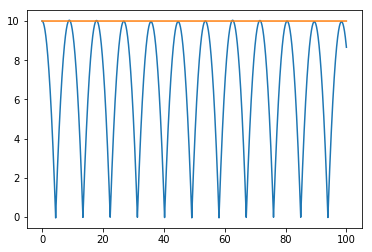

1.4901161193847657e-12 10.0 -1.49011611938e-12
1.490265130996704e-08 10.0 -1.490265131e-08
1.639142632484436e-07 10.0 -1.63914263248e-07
1.6540303826332093e-06 10.0 -1.65403038263e-06
1.6555191576480865e-05 9.99999999986 -1.65551915765e-05
0.00016556680351495742 9.99999998629 -0.000165566803515
0.0016556829228997231 9.99999862936 -0.0016556829229
0.011655682922899722 9.99993207253 -0.0116556829229
0.021655682922899724 9.9997655157 -0.0216556829229
0.031655682922899726 9.99949895887 -0.0316556829229
0.04165568292289973 9.99913240204 -0.0416556829229
0.05165568292289973 9.99866584521 -0.0516556829229
0.06165568292289973 9.99809928838 -0.0616556829229
0.07165568292289973 9.99743273155 -0.0716556829229
0.08165568292289972 9.99666617472 -0.0816556829229
0.09165568292289972 9.99579961789 -0.0916556829229
0.10165568292289971 9.99483306106 -0.101655682923
0.11165568292289971 9.99376650424 -0.111655682923
0.1216556829228997 9.99259994741 -0.121655682923
0.1316556829228997 9.99133339058 -0.13165

8.527910101493545 9.94998795545 0.425401264352
8.537910101493544 9.9541919681 0.415401264352
8.547910101493544 9.95829598074 0.405401264352
8.557910101493544 9.96229999338 0.395401264352
8.567910101493544 9.96620400603 0.385401264352
8.577910101493543 9.97000801867 0.375401264352
8.587910101493543 9.97371203131 0.365401264352
8.597910101493543 9.97731604396 0.355401264352
8.607910101493543 9.9808200566 0.345401264352
8.617910101493543 9.98422406924 0.335401264352
8.627910101493542 9.98752808189 0.325401264352
8.637910101493542 9.99073209453 0.315401264352
8.647910101493542 9.99383610718 0.305401264352
8.657910101493542 9.99684011982 0.295401264352
8.667910101493542 9.99974413246 0.285401264352
8.677910101493541 10.0025481451 0.275401264352
8.687910101493541 10.0052521577 0.265401264352
8.697910101493541 10.0078561704 0.255401264352
8.70791010149354 10.010360183 0.245401264352
8.71791010149354 10.0127641957 0.235401264352
8.72791010149354 10.0150682083 0.225401264352
8.73791010149354 10

17.051690230811346 9.65585441176 0.86081860633
17.061690230811347 9.66441259782 0.85081860633
17.07169023081135 9.67287078388 0.84081860633
17.08169023081135 9.68122896995 0.83081860633
17.091690230811352 9.68948715601 0.82081860633
17.101690230811354 9.69764534207 0.81081860633
17.111690230811355 9.70570352814 0.80081860633
17.121690230811357 9.7136617142 0.79081860633
17.13169023081136 9.72151990026 0.78081860633
17.14169023081136 9.72927808633 0.77081860633
17.15169023081136 9.73693627239 0.76081860633
17.161690230811363 9.74449445845 0.75081860633
17.171690230811365 9.75195264452 0.74081860633
17.181690230811366 9.75931083058 0.73081860633
17.191690230811368 9.76656901664 0.72081860633
17.20169023081137 9.77372720271 0.71081860633
17.21169023081137 9.78078538877 0.70081860633
17.221690230811372 9.78774357483 0.69081860633
17.231690230811374 9.7946017609 0.68081860633
17.241690230811376 9.80135994696 0.67081860633
17.251690230811377 9.80801813302 0.66081860633
17.26169023081138 9.81

24.673668409867233 7.60003644297 2.18720321462
24.683668409867234 7.62185847512 2.17720321462
24.693668409867236 7.64358050726 2.16720321462
24.703668409867237 7.66520253941 2.15720321462
24.71366840986724 7.68672457156 2.14720321462
24.72366840986724 7.7081466037 2.13720321462
24.733668409867242 7.72946863585 2.12720321462
24.743668409867244 7.75069066799 2.11720321462
24.753668409867245 7.77181270014 2.10720321462
24.763668409867247 7.79283473229 2.09720321462
24.77366840986725 7.81375676443 2.08720321462
24.78366840986725 7.83457879658 2.07720321462
24.79366840986725 7.85530082872 2.06720321462
24.803668409867253 7.87592286087 2.05720321462
24.813668409867255 7.89644489302 2.04720321462
24.823668409867256 7.91686692516 2.03720321462
24.833668409867258 7.93718895731 2.02720321462
24.84366840986726 7.95741098946 2.01720321462
24.85366840986726 7.9775330216 2.00720321462
24.863668409867262 7.99755505375 1.99720321462
24.873668409867264 8.01747708589 1.98720321462
24.883668409867266 8.0

33.526878120377425 7.39375496852 2.26958707488
33.53687812037742 7.41640083927 2.25958707488
33.54687812037742 7.43894671002 2.24958707488
33.55687812037742 7.46139258077 2.23958707488
33.56687812037742 7.48373845151 2.22958707488
33.576878120377415 7.50598432226 2.21958707488
33.58687812037741 7.52813019301 2.20958707488
33.59687812037741 7.55017606376 2.19958707488
33.60687812037741 7.57212193451 2.18958707488
33.61687812037741 7.59396780526 2.17958707488
33.626878120377405 7.61571367601 2.16958707488
33.6368781203774 7.63735954676 2.15958707488
33.6468781203774 7.6589054175 2.14958707488
33.6568781203774 7.68035128825 2.13958707488
33.6668781203774 7.701697159 2.12958707488
33.676878120377395 7.72294302975 2.11958707488
33.68687812037739 7.7440889005 2.10958707488
33.69687812037739 7.76513477125 2.09958707488
33.70687812037739 7.786080642 2.08958707488
33.71687812037739 7.80692651275 2.07958707488
33.726878120377386 7.82767238349 2.06958707488
33.73687812037738 7.84831825424 2.05958

42.0114936875015 6.28289221699 2.715797358
42.0214936875015 6.31000019057 2.705797358
42.031493687501495 6.33700816415 2.695797358
42.04149368750149 6.36391613773 2.685797358
42.05149368750149 6.39072411131 2.675797358
42.06149368750149 6.41743208489 2.665797358
42.07149368750149 6.44404005847 2.655797358
42.081493687501485 6.47054803205 2.645797358
42.09149368750148 6.49695600563 2.635797358
42.10149368750148 6.52326397921 2.625797358
42.11149368750148 6.54947195279 2.615797358
42.12149368750148 6.57557992637 2.605797358
42.131493687501475 6.60158789995 2.595797358
42.14149368750147 6.62749587353 2.585797358
42.15149368750147 6.65330384711 2.575797358
42.16149368750147 6.67901182069 2.565797358
42.17149368750147 6.70461979427 2.555797358
42.181493687501465 6.73012776785 2.545797358
42.19149368750146 6.75553574143 2.535797358
42.20149368750146 6.78084371501 2.525797358
42.21149368750146 6.80605168859 2.515797358
42.22149368750146 6.83115966217 2.505797358
42.231493687501455 6.856167635

50.70744722974652 5.62750849805 2.95824909975
50.71744722974652 5.65704098905 2.94824909975
50.72744722974652 5.68647348004 2.93824909975
50.737447229746515 5.71580597104 2.92824909975
50.74744722974651 5.74503846204 2.91824909975
50.75744722974651 5.77417095304 2.90824909975
50.76744722974651 5.80320344403 2.89824909975
50.77744722974651 5.83213593503 2.88824909975
50.787447229746505 5.86096842603 2.87824909975
50.7974472297465 5.88970091703 2.86824909975
50.8074472297465 5.91833340802 2.85824909975
50.8174472297465 5.94686589902 2.84824909975
50.8274472297465 5.97529839002 2.83824909975
50.837447229746495 6.00363088102 2.82824909975
50.84744722974649 6.03186337201 2.81824909975
50.85744722974649 6.05999586301 2.80824909975
50.86744722974649 6.08802835401 2.79824909975
50.87744722974649 6.11596084501 2.78824909975
50.887447229746485 6.143793336 2.77824909975
50.89744722974648 6.171525827 2.76824909975
50.90744722974648 6.199158318 2.75824909975
50.91744722974648 6.226690809 2.74824909

59.723502477409916 5.84566957229 2.89569565258
59.733502477409914 5.87457652881 2.88569565258
59.74350247740991 5.90338348534 2.87569565258
59.75350247740991 5.93209044187 2.86569565258
59.76350247740991 5.96069739839 2.85569565258
59.773502477409906 5.98920435492 2.84569565258
59.783502477409904 6.01761131144 2.83569565258
59.7935024774099 6.04591826797 2.82569565258
59.8035024774099 6.07412522449 2.81569565258
59.8135024774099 6.10223218102 2.80569565258
59.823502477409896 6.13023913755 2.79569565258
59.833502477409894 6.15814609407 2.78569565258
59.84350247740989 6.1859530506 2.77569565258
59.85350247740989 6.21366000712 2.76569565258
59.86350247740989 6.24126696365 2.75569565258
59.873502477409886 6.26877392018 2.74569565258
59.883502477409884 6.2961808767 2.73569565258
59.89350247740988 6.32348783323 2.72569565258
59.90350247740988 6.35069478975 2.71569565258
59.91350247740988 6.37780174628 2.70569565258
59.923502477409876 6.4048087028 2.69569565258
59.933502477409874 6.4317156593

68.36739634212405 4.87262846308 3.21041048271
68.37739634212406 4.9046825679 3.20041048271
68.38739634212406 4.93663667273 3.19041048271
68.39739634212407 4.96849077756 3.18041048271
68.40739634212407 5.00024488238 3.17041048271
68.41739634212408 5.03189898721 3.16041048271
68.42739634212408 5.06345309204 3.15041048271
68.43739634212409 5.09490719687 3.14041048271
68.4473963421241 5.12626130169 3.13041048271
68.4573963421241 5.15751540652 3.12041048271
68.4673963421241 5.18866951135 3.11041048271
68.47739634212411 5.21972361617 3.10041048271
68.48739634212411 5.250677721 3.09041048271
68.49739634212412 5.28153182583 3.08041048271
68.50739634212412 5.31228593066 3.07041048271
68.51739634212413 5.34294003548 3.06041048271
68.52739634212413 5.37349414031 3.05041048271
68.53739634212414 5.40394824514 3.04041048271
68.54739634212415 5.43430234996 3.03041048271
68.55739634212415 5.46455645479 3.02041048271
68.56739634212416 5.49471055962 3.01041048271
68.57739634212416 5.52476466444 3.000410

77.37003622763544 5.01281465743 3.15694963179
77.38003622763544 5.04433415375 3.14694963179
77.39003622763545 5.07575365007 3.13694963179
77.40003622763545 5.10707314638 3.12694963179
77.41003622763546 5.1382926427 3.11694963179
77.42003622763546 5.16941213902 3.10694963179
77.43003622763547 5.20043163534 3.09694963179
77.44003622763547 5.23135113165 3.08694963179
77.45003622763548 5.26217062797 3.07694963179
77.46003622763548 5.29289012429 3.06694963179
77.47003622763549 5.32350962061 3.05694963179
77.4800362276355 5.35402911693 3.04694963179
77.4900362276355 5.38444861324 3.03694963179
77.5000362276355 5.41476810956 3.02694963179
77.51003622763551 5.44498760588 3.01694963179
77.52003622763552 5.4751071022 3.00694963179
77.53003622763552 5.50512659852 2.99694963179
77.54003622763553 5.53504609483 2.98694963179
77.55003622763553 5.56486559115 2.97694963179
77.56003622763554 5.59458508747 2.96694963179
77.57003622763554 5.62420458379 2.95694963179
77.58003622763555 5.6537240801 2.946949

86.2228029450315 4.71779987202 3.24028365082
86.23280294503151 4.75015270853 3.23028365082
86.24280294503151 4.78240554504 3.22028365082
86.25280294503152 4.81455838154 3.21028365082
86.26280294503152 4.84661121805 3.20028365082
86.27280294503153 4.87856405456 3.19028365082
86.28280294503153 4.91041689107 3.18028365082
86.29280294503154 4.94216972758 3.17028365082
86.30280294503154 4.97382256409 3.16028365082
86.31280294503155 5.00537540059 3.15028365082
86.32280294503155 5.0368282371 3.14028365082
86.33280294503156 5.06818107361 3.13028365082
86.34280294503156 5.09943391012 3.12028365082
86.35280294503157 5.13058674663 3.11028365082
86.36280294503158 5.16163958313 3.10028365082
86.37280294503158 5.19259241964 3.09028365082
86.38280294503159 5.22344525615 3.08028365082
86.39280294503159 5.25419809266 3.07028365082
86.4028029450316 5.28485092917 3.06028365082
86.4128029450316 5.31540376568 3.05028365082
86.4228029450316 5.34585660218 3.04028365082
86.43280294503161 5.37620943869 3.03028

93.95728168590719 0.130531801318 4.43523760831
93.9672816859072 0.174834177401 4.42523760831
93.9772816859072 0.219036553484 4.41523760831
93.9872816859072 0.263138929568 4.40523760831
93.99728168590721 0.307141305651 4.39523760831
94.00728168590722 0.351043681734 4.38523760831
94.01728168590722 0.394846057817 4.37523760831
94.02728168590723 0.4385484339 4.36523760831
94.03728168590723 0.482150809983 4.35523760831
94.04728168590724 0.525653186066 4.34523760831
94.05728168590724 0.569055562149 4.33523760831
94.06728168590725 0.612357938232 4.32523760831
94.07728168590725 0.655560314315 4.31523760831
94.08728168590726 0.698662690398 4.30523760831
94.09728168590726 0.741665066481 4.29523760831
94.10728168590727 0.784567442564 4.28523760831
94.11728168590727 0.827369818647 4.27523760831
94.12728168590728 0.87007219473 4.26523760831
94.13728168590728 0.912674570813 4.25523760831
94.14728168590729 0.955176946897 4.24523760831
94.1572816859073 0.99757932298 4.23523760831
94.1672816859073 1.03

In [17]:
# Bouncing ball, with instant bounce

import scipy.integrate as sint
import numpy as np
import matplotlib.pyplot as plt

def rhs(t, y):
    # gravity
    return [y[1], -1]

#t = np.linspace(0,10,100)
# initial height and velocity
y0 = [10, 0]
# max dt
dt=0.01

solver = sint.ode(rhs)
solver.set_integrator("vode", method="adams", with_jacobian=False,
                      max_step=dt
                     ) 
solver.set_initial_value(y0)

t_end = 100
time = []
solution_y = []
solution_dy = []
while solver.successful() and solver.t < t_end:
    # Integrate just single step
    y = solver.integrate(t_end, step=True)
    time.append(solver.t)
    solution_y.append(y[0])
    solution_dy.append(y[1])
    
    # check bounce
    if y[0] < 0.0:
        #dy = - y[0]/(y_last[0] - y[0])
        #dv = dy*(y_last[1] - y[1])
        #y0 = [-y[0], -y[1]]
        y0 = [-y[0], - y_last[1]]
        solver.set_initial_value(y0, solver.t)
    y_last = y    
    #t_jump = np.inf
        

plt.plot(time, solution_y)
plt.plot(time, 10*np.ones(len(time)))
plt.show()
for t, y, dy in zip(time, solution_y, solution_dy):
    print(t, y, dy)
#X=np.array(X)
#print(X[1:]-X[:-1])

## Cvičení - ODE

Simulace skákajícího míčku. 

Lineární pohyb v proměnné $x$:
$$ x(t) = v_x t $$
... $v_x$ je daná horizontální rychlost.

Gravitační síla pro míček ve vzduchu:
$$ y''(t) = -g \text{ pro } y(t) > R$$
... $g$ je gravitační zrychlení.

Elastická síla působí na míček dotýkající se podložky:
$$ y''(t) = k(R - y(t)) \text{ pro } y(t) < R$$
... $R$ je poloměr míčku, $k$ je elastický koeficient míčku, volíme výrazně větší než $g$.

Postup řešení:
- Skalární rovnici druhého řádu pro $y$ převeďte na soustavu rovnic prvního řádu pro $y$ a $y'$.
- Implementujte python funkci pro vyhodnocení působící síly:

  ```
        def force(t, y):
            y_0, y_1 = y                 # y - je dvou složkový numpy vektor 
            ...
            return np.array([f_0, f_1])  # vrací se též numpy vektor, f_0 bude nula            
  ```
- použijte scipy.integrate.solve_ivp pro řešení rovnice
- zobrazte trajektorii míčku pomocí matplotlib

